In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import cv2
from PIL import Image
from LandsatReader import LandsatReader

In [46]:
dir_path = "/mnt/Data/Optical/Landsat/LC09_L1TP_165039_20250730_20250801_02_T1/"
reader = LandsatReader(dir_path)
bands = reader.get_bands()

print(f"Loaded {len(bands)} bands")
print(f"Band 1 shape: {bands[0].shape}")

Loaded 11 bands
Band 1 shape: (7881, 7761)


In [47]:
for i in range(0,11):
    print(bands[i].shape)

(7881, 7761)
(7881, 7761)
(7881, 7761)
(7881, 7761)
(7881, 7761)
(7881, 7761)
(7881, 7761)
(15761, 15521)
(7881, 7761)
(7881, 7761)
(7881, 7761)


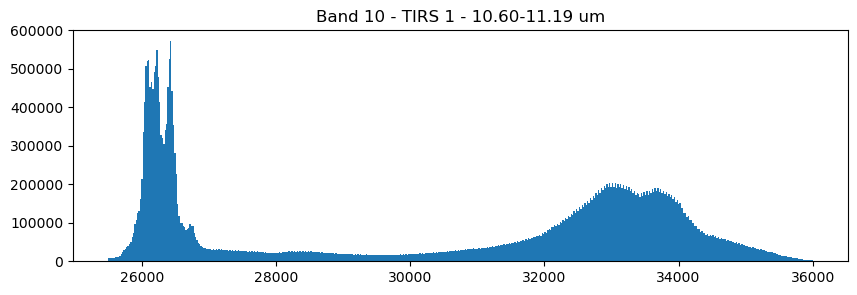

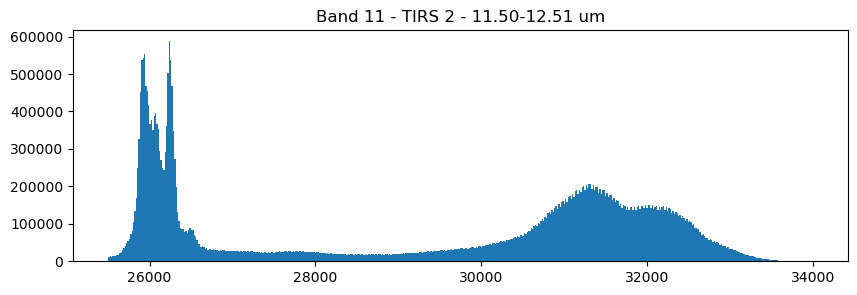

In [79]:
Band_Number = 10
plt.figure(figsize=[10,3])
plt.hist(bands[Band_Number - 1].flatten(), bins=256*2,range= [25500,36000])
plt.title(f"Band {Band_Number} - TIRS 1 - 10.60-11.19 um")
plt.show()

Band_Number = 11
plt.figure(figsize=[10,3])
plt.hist(bands[Band_Number - 1].flatten(), bins=256*2,range= [25500,34000])
plt.title(f"Band {Band_Number} - TIRS 2 - 11.50-12.51 um")
plt.show()

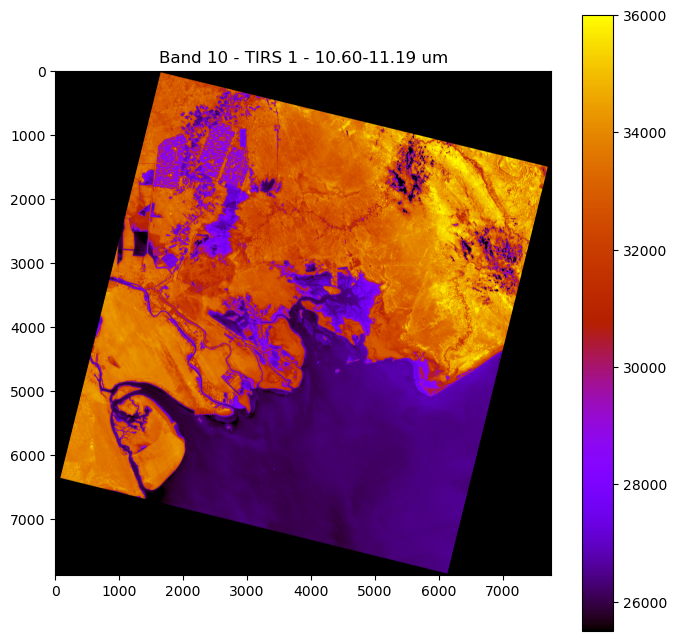

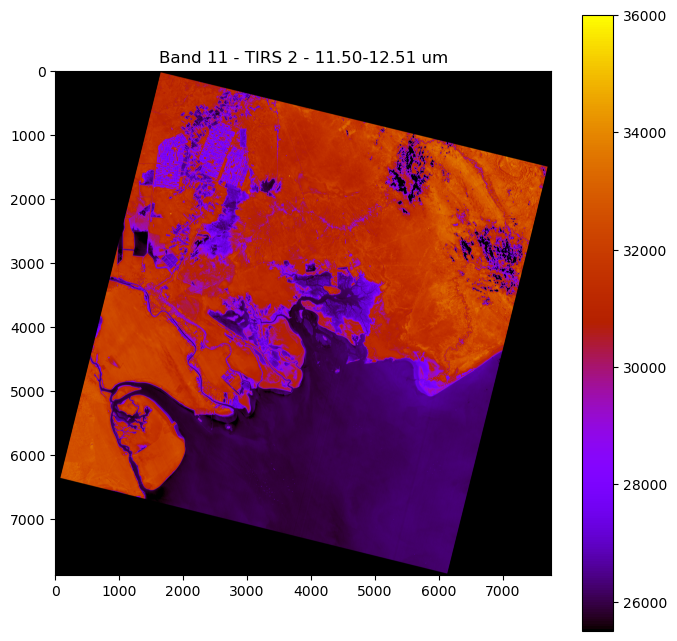

In [89]:
Band_Number = 10
plt.figure(figsize=[8,8])
plt.imshow(bands[Band_Number - 1], vmin=25500, vmax=36000, cmap = 'gnuplot')
plt.colorbar()
plt.title(f"Band {Band_Number} - TIRS 1 - 10.60-11.19 um")
plt.show()

Band_Number = 11
plt.figure(figsize=[8,8])
plt.imshow(bands[Band_Number - 1], vmin=25500, vmax=36000, cmap = 'gnuplot')
plt.colorbar()
plt.title(f"Band {Band_Number} - TIRS 2 - 11.50-12.51 um")
plt.show()

(2000, 2000)


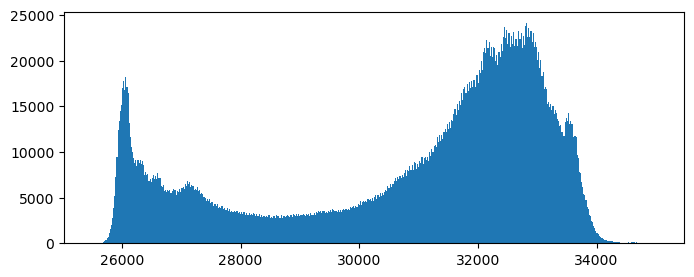

(2000, 2000)


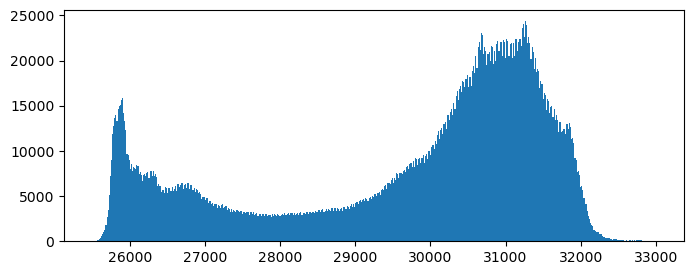

In [90]:
Band_Number = 10
B10_cropped = bands[Band_Number - 1][3000:5000, 2000:4000].copy()
print(B10_cropped.shape)
plt.figure(figsize=[8,3])
plt.hist(B10_cropped.flatten(), bins=256*2,range= [25500,35000])
plt.show()

Band_Number = 11
B11_cropped = bands[Band_Number - 1][3000:5000, 2000:4000].copy()
print(B11_cropped.shape)
plt.figure(figsize=[8,3])
plt.hist(B11_cropped.flatten(), bins=256*2,range= [25500,33000])
plt.show()

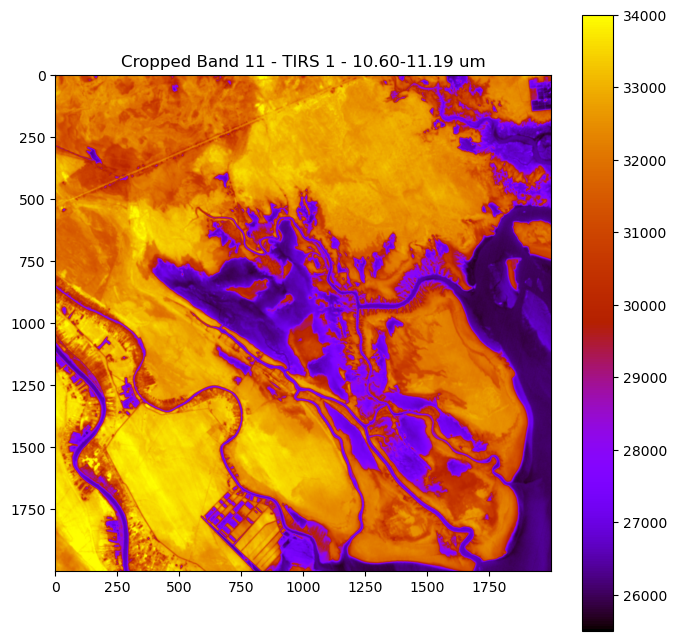

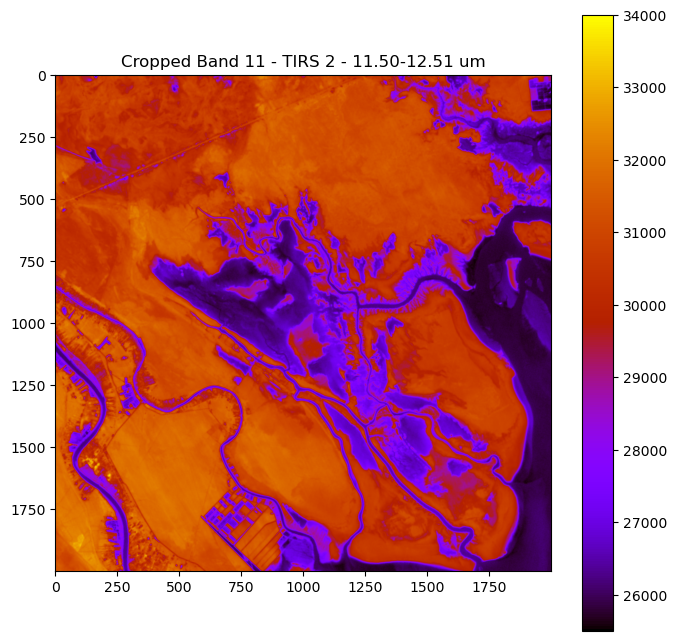

In [91]:
plt.figure(figsize=[8,8])
plt.imshow(B10_cropped, vmin=25500, vmax=34000, cmap = 'gnuplot')
plt.colorbar()
plt.title(f"Cropped Band {Band_Number} - TIRS 1 - 10.60-11.19 um")
plt.show()

plt.figure(figsize=[8,8])
plt.imshow(B11_cropped, vmin=25500, vmax=34000, cmap = 'gnuplot')
plt.colorbar()
plt.title(f"Cropped Band {Band_Number} - TIRS 2 - 11.50-12.51 um")
plt.show()

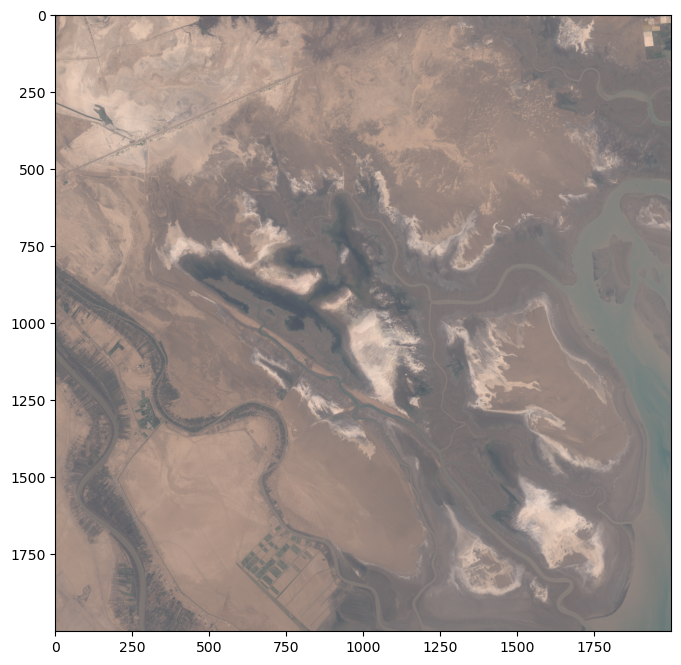

In [87]:
B1_cropped = bands[1][3000:5000, 2000:4000].copy()
B2_cropped = bands[2][3000:5000, 2000:4000].copy()
B3_cropped = bands[3][3000:5000, 2000:4000].copy()
rgb_img = np.dstack([B3_cropped, B2_cropped, B1_cropped]).astype(np.float32)
rgb_img = rgb_img / rgb_img.max()       # normalized to 1
plt.figure(figsize=(8, 8))
plt.imshow(rgb_img)
plt.show()